## Important parameters
<br>xt_ocean: longitude, length 3600
<br>yt_ocean: latitude, length 1500
<br> [mind map](https://miro.com/app/board/o9J_lM4N1Pg=/?fromRedirect=1)

In [1]:
import netCDF4 as nc4
import keras
import xarray,numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
from tensorflow.keras import layers

# Load data

In [2]:
import glob
input_data_split = []
for np_name in glob.glob('dataset/*.np[yz]'):
    input_data_split.append(np.load(np_name))
np.array(input_data_split).shape

(2251, 128, 128, 1)

# Randomly select 1500 samples

In [3]:
import random
n = 1500 # sample size
input_data_split = np.array(random.sample(input_data_split,n))
input_data_split.shape

(1500, 128, 128, 1)

# split train set & validation set

In [4]:
train_set, test_set = train_test_split(input_data_split, test_size=0.3333333)
train_set.shape

(1000, 128, 128, 1)

# Autoencoder

In [5]:
lat = 128 # chunk size
long = 128 # chunk size

input_img = keras.Input(shape=(lat, long,1))

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu',strides=(1,1), padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((4, 4))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 4)         292       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 4)         148       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 8)         296   

In [6]:
history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

Epoch 1/50
32/32 [==============================] - 7s 204ms/step - loss: 0.0373 - val_loss: 0.0240
Epoch 2/50
32/32 [==============================] - 5s 154ms/step - loss: 0.0219 - val_loss: 0.0128
Epoch 3/50
32/32 [==============================] - 5s 161ms/step - loss: 0.0077 - val_loss: 0.0015
Epoch 4/50
32/32 [==============================] - 5s 159ms/step - loss: 0.0013 - val_loss: 9.9938e-04
Epoch 5/50
32/32 [==============================] - 5s 164ms/step - loss: 9.3337e-04 - val_loss: 7.9301e-04
Epoch 6/50
32/32 [==============================] - 5s 161ms/step - loss: 7.5020e-04 - val_loss: 6.6369e-04
Epoch 7/50
32/32 [==============================] - 5s 154ms/step - loss: 6.4379e-04 - val_loss: 5.9052e-04
Epoch 8/50
32/32 [==============================] - 5s 150ms/step - loss: 5.7433e-04 - val_loss: 5.3213e-04
Epoch 9/50
32/32 [==============================] - 5s 153ms/step - loss: 5.1957e-04 - val_loss: 4.8670e-04
Epoch 10/50
32/32 [==============================] - 5s 

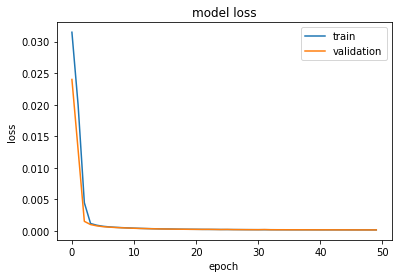

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [10]:
decoded_data = autoencoder.predict(np.array([test_set[10]]))

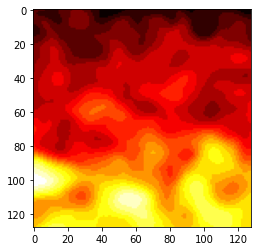

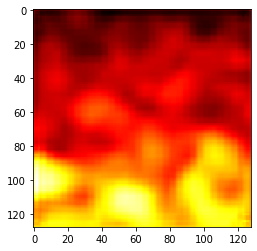

In [12]:
plt.imshow(test_set[10],cmap='hot')
plt.show()
plt.imshow(decoded_data[0,:,:,0],cmap='hot')
plt.show()

## bottleneck size 32 x 32 x n, where n = 1,2,4,8, 16

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 2)       20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 2)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 1)         19        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 32, 1)         10        
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 32, 2)         20  

Epoch 2/50
32/32 [==============================] - 7s 233ms/step - loss: 0.0280 - val_loss: 0.0209
Epoch 3/50
32/32 [==============================] - 5s 171ms/step - loss: 0.0204 - val_loss: 0.0180
Epoch 4/50
32/32 [==============================] - 5s 145ms/step - loss: 0.0173 - val_loss: 0.0156
Epoch 5/50
32/32 [==============================] - 5s 150ms/step - loss: 0.0152 - val_loss: 0.0133
Epoch 6/50
32/32 [==============================] - 4s 132ms/step - loss: 0.0125 - val_loss: 0.0082
Epoch 7/50
32/32 [==============================] - 4s 130ms/step - loss: 0.0065 - val_loss: 0.0021
Epoch 8/50
32/32 [==============================] - 5s 145ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/50
32/32 [==============================] - 5s 153ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/50
32/32 [==============================] - 4s 135ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 11/50
32/32 [==============================] - 4s 140ms/step - loss: 0.0012 - val_loss: 0.001

32/32 [==============================] - 5s 155ms/step - loss: 3.4238e-04 - val_loss: 3.3086e-04
Epoch 15/50
32/32 [==============================] - 5s 156ms/step - loss: 3.2741e-04 - val_loss: 3.1294e-04
Epoch 16/50
32/32 [==============================] - 5s 154ms/step - loss: 3.1146e-04 - val_loss: 2.9913e-04
Epoch 17/50
32/32 [==============================] - 5s 155ms/step - loss: 2.9746e-04 - val_loss: 2.8785e-04
Epoch 18/50
32/32 [==============================] - 5s 156ms/step - loss: 2.8649e-04 - val_loss: 2.7936e-04
Epoch 19/50
32/32 [==============================] - 5s 155ms/step - loss: 2.7669e-04 - val_loss: 2.6900e-04
Epoch 20/50
32/32 [==============================] - 5s 155ms/step - loss: 2.6886e-04 - val_loss: 2.6057e-04
Epoch 21/50
32/32 [==============================] - 5s 155ms/step - loss: 2.6062e-04 - val_loss: 2.5339e-04
Epoch 22/50
32/32 [==============================] - 5s 157ms/step - loss: 2.5349e-04 - val_loss: 2.5185e-04
Epoch 23/50
32/32 [============

32/32 [==============================] - 7s 218ms/step - loss: 1.4274e-04 - val_loss: 1.4713e-04
Epoch 26/50
32/32 [==============================] - 7s 221ms/step - loss: 1.4392e-04 - val_loss: 1.3587e-04
Epoch 27/50
32/32 [==============================] - 7s 223ms/step - loss: 1.4053e-04 - val_loss: 1.3781e-04
Epoch 28/50
32/32 [==============================] - 7s 220ms/step - loss: 1.3709e-04 - val_loss: 1.3165e-04
Epoch 29/50
32/32 [==============================] - 7s 220ms/step - loss: 1.3635e-04 - val_loss: 1.3747e-04
Epoch 30/50
32/32 [==============================] - 7s 220ms/step - loss: 1.3324e-04 - val_loss: 1.3358e-04
Epoch 31/50
32/32 [==============================] - 7s 221ms/step - loss: 1.3713e-04 - val_loss: 1.4663e-04
Epoch 32/50
32/32 [==============================] - 7s 220ms/step - loss: 1.3727e-04 - val_loss: 1.2660e-04
Epoch 33/50
32/32 [==============================] - 7s 220ms/step - loss: 1.2892e-04 - val_loss: 1.6031e-04
Epoch 34/50
32/32 [============

32/32 [==============================] - 13s 415ms/step - loss: 1.2528e-04 - val_loss: 1.1613e-04
Epoch 30/50
32/32 [==============================] - 13s 408ms/step - loss: 1.1821e-04 - val_loss: 1.1462e-04
Epoch 31/50
32/32 [==============================] - 13s 405ms/step - loss: 1.1641e-04 - val_loss: 1.1902e-04
Epoch 32/50
32/32 [==============================] - 14s 428ms/step - loss: 1.1853e-04 - val_loss: 1.1293e-04
Epoch 33/50
32/32 [==============================] - 13s 410ms/step - loss: 1.1684e-04 - val_loss: 1.1827e-04
Epoch 34/50
32/32 [==============================] - 13s 399ms/step - loss: 1.2277e-04 - val_loss: 1.2050e-04
Epoch 35/50
32/32 [==============================] - 13s 421ms/step - loss: 1.1884e-04 - val_loss: 1.1024e-04
Epoch 36/50
32/32 [==============================] - 13s 420ms/step - loss: 1.1311e-04 - val_loss: 1.0984e-04
Epoch 37/50
32/32 [==============================] - 13s 420ms/step - loss: 1.1749e-04 - val_loss: 1.0859e-04
Epoch 38/50
32/32 [===

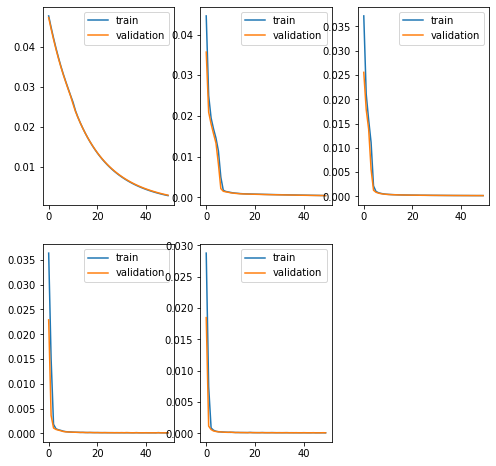

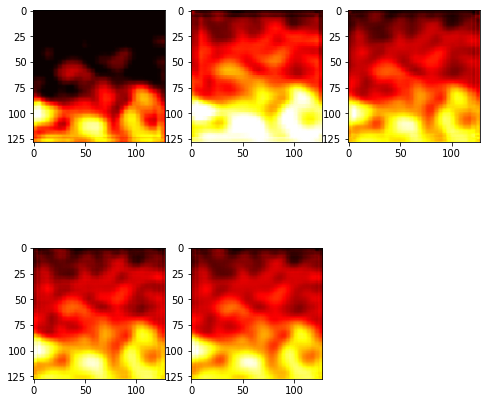

In [13]:
input_img = keras.Input(shape=(lat, long,1))

fig1 = plt.figure(figsize=(8,8)) # mse loss
fig2 = plt.figure(figsize=(8,8)) # image

for i in range(1,6):
    x = layers.Conv2D(math.pow(2,i), (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(math.pow(2,i-1), (3, 3), activation='relu',strides=(1,1), padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2DTranspose(math.pow(2,i-1), (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(math.pow(2,i), (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((4, 4))(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

    decoded_data = autoencoder.predict(np.array([test_set[10]]))
    
    ax1 = fig1.add_subplot(2,3,i)
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.legend(['train', 'validation'], loc='upper right')
    
    ax2 = fig2.add_subplot(2,3,i)
    ax2.imshow(decoded_data[0,:,:,0],cmap='hot')

## bottleneck size n x n x 4, where n = 32, 16, 8 or 4

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 128, 4)       40        
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 2)         74        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 2)         0         
_________________________________________________________________
conv2d_transpose_39 (Conv2DT (None, 32, 32, 2)         38        
_________________________________________________________________
conv2d_transpose_40 (Conv2DT (None, 32, 32, 4)         76 

32/32 [==============================] - 5s 127ms/step - loss: 0.0458 - val_loss: 0.0243
Epoch 2/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0199 - val_loss: 0.0157
Epoch 3/50
32/32 [==============================] - 4s 122ms/step - loss: 0.0149 - val_loss: 0.0119
Epoch 4/50
32/32 [==============================] - 4s 127ms/step - loss: 0.0109 - val_loss: 0.0084
Epoch 5/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 6/50
32/32 [==============================] - 4s 126ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 7/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 8/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/50
32/32 [==============================] - 4s 126ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 11/5

Epoch 8/50
32/32 [==============================] - 4s 122ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 9/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 10/50
32/32 [==============================] - 4s 127ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 11/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 12/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 13/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 14/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 15/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 16/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 17/50
32/32 [==============================] - 4s 126ms/step - loss: 0.0033 - val_loss:

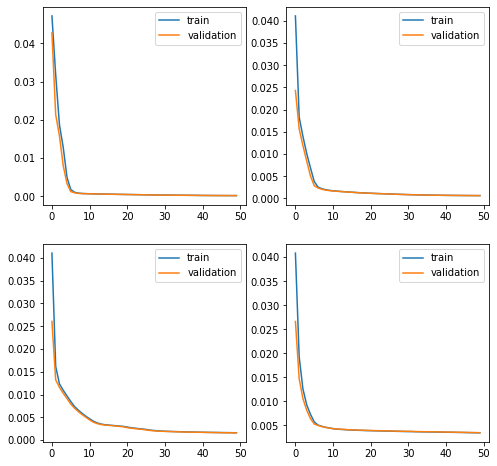

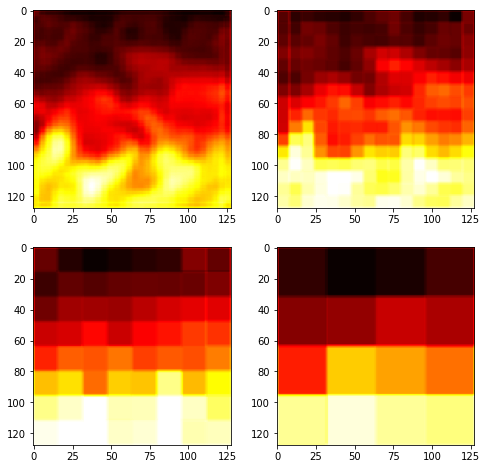

In [14]:
fig3 = plt.figure(figsize=(8,8)) # mse loss
fig4 = plt.figure(figsize=(8,8)) # image

for i in range(1,5):
    x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(2, (3, 3), activation='relu',strides=(1,1), padding='same')(x)
    encoded = layers.MaxPooling2D((int(math.pow(2,i)),int(math.pow(2,i))), padding='same')(x)

    x = layers.Conv2DTranspose(2, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((int(math.pow(2,i+1)),int(math.pow(2,i+1))))(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

    decoded_data = autoencoder.predict(np.array([test_set[10]]))
    
    ax1 = fig3.add_subplot(2,2,i)
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.legend(['train', 'validation'], loc='upper right')
    
    ax2 = fig4.add_subplot(2,2,i) 
    ax2.imshow(decoded_data[0,:,:,0],cmap='hot')

In [12]:
# aaa

# aaa